In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
file_path = 'ShortVRCombined.xlsx'

try:
    xls = pd.ExcelFile(file_path)
    final_sheet_name = xls.sheet_names[-1]
    df_final = pd.read_excel(xls, sheet_name=final_sheet_name)
    
    df_final.rename(columns={df_final.columns[0]: 'ID'}, inplace=True)
    df_final.set_index('ID', inplace=True)
    
    df_anagrafica = df_final.iloc[:, :7]
    df_quantitativo = df_final.iloc[:, 8:22]
    df_risposte_aperte = df_final.iloc[:, 22:]

except FileNotFoundError:
    print(f"Errore: Il file '{file_path}' non è stato trovato.")
except Exception as e:
    print(f"Si è verificato un errore: {e}")

ANAGRAFICA

In [ ]:
df_anagrafica.iloc[:, -3:] = df_anagrafica.iloc[:, -3:].apply(lambda x: x.astype(str).str.strip().str.capitalize())

df_anagrafica

,Age,Sex,Gender,Ethnicity,Residence,BirthNation,NativeLanguage
ID,,,,,,,
201,2,2,2,7,Italy,Italy,Italian
202,1,1,1,7,Italy,Italy,Italian
203,2,2,2,7,Italy,Italy,Italian
204,1,2,2,7,Italy,Italy,Italian
205,2,1,1,7,Italy,Italy,Italian


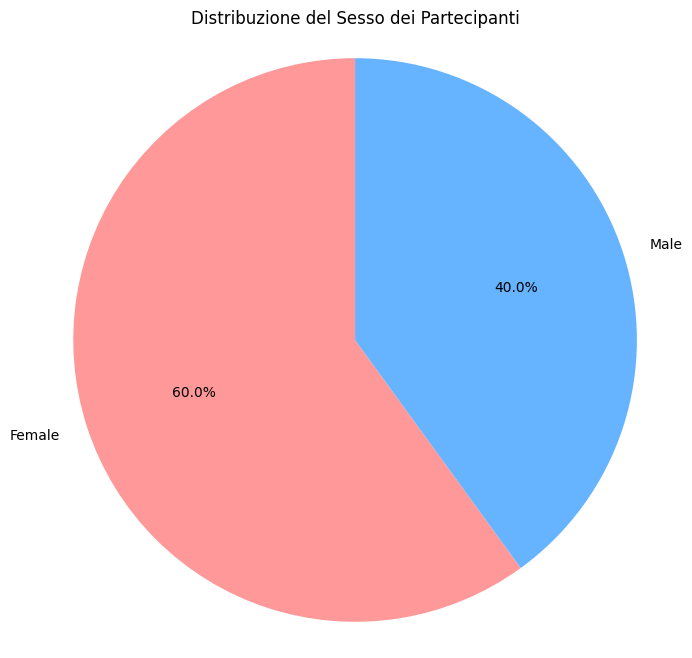

In [19]:
# Definizione del dizionario di mappatura
sesso_map = {1: 'Male', 2: 'Female'}

# Applica la mappatura e calcola il conteggio
sesso_counts = df_anagrafica['Sex'].map(sesso_map).value_counts()

# Crea il grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(sesso_counts, labels=sesso_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff',])
plt.title('Distribuzione del Sesso dei Partecipanti')
plt.axis('equal')  # Assicura che il grafico a torta sia circolare.
plt.show()

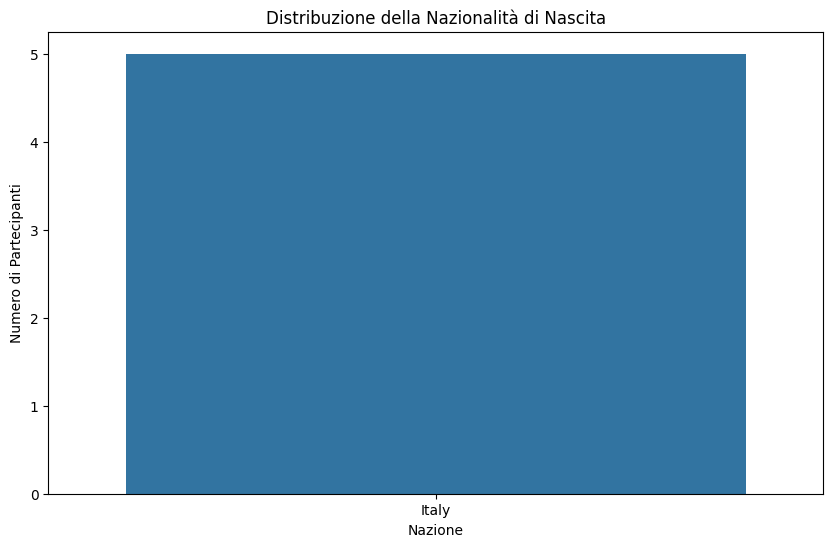

In [20]:
# Calcola il conteggio di ogni nazionalità
nazione_counts = df_anagrafica['BirthNation'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=nazione_counts.index, y=nazione_counts.values)
plt.title('Distribuzione della Nazionalità di Nascita')
plt.xlabel('Nazione')
plt.ylabel('Numero di Partecipanti')
plt.show()

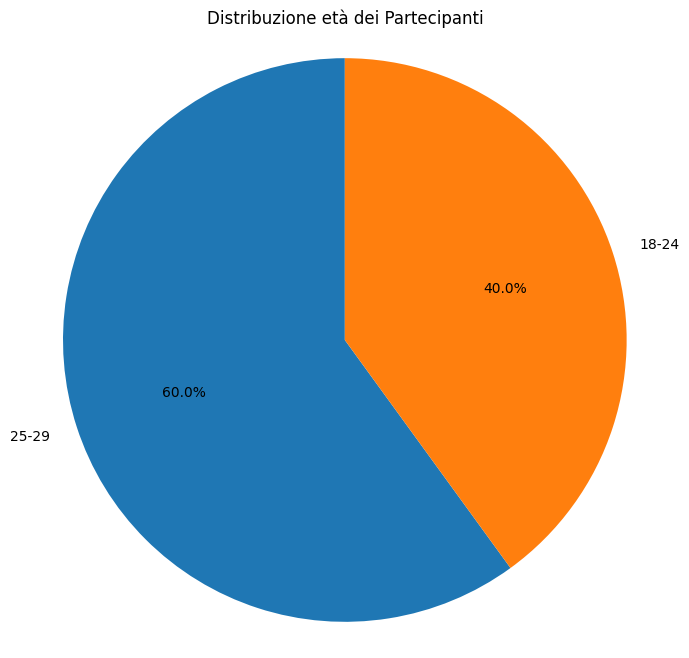

In [21]:
age_map = {1 : "18-24", 2 : "25-29"}

age_counts = df_anagrafica['Age'].map(age_map).value_counts()

# Crea il grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuzione età dei Partecipanti')
plt.axis('equal')  # Assicura che il grafico a torta sia circolare.
plt.show()

# Big Five Indicator, Commensality, Loneliness and PANAS

In [ ]:
df_quantitativo = df_quantitativo.round(2)

df_quantitativo

,BFI_N,BFI_E,BFI_O,BFI_A,BFI_C,Comm,FreqEat,TechEat,UseofTech,PANAS_Pos,PANAS_Neg,LON,PANASSIT_Pos,PANASSIT_Neg
ID,,,,,,,,,,,,,,
201,5.33,3.33,7.67,7.00,6.67,3.8,3.00,3.25,3.2,2.9,1.4,2.00,3.1,1.2
202,3.67,5.67,9.00,8.67,7.00,4.0,3.00,4.25,3.0,4.3,2.2,2.00,3.6,1.6
203,6.33,6.00,8.00,7.00,5.33,3.2,2.50,3.75,2.8,3.3,3.1,2.00,3.2,2.3
204,6.00,7.00,9.00,9.33,5.33,4.3,3.00,3.00,3.4,3.4,1.9,1.67,3.1,1.3
205,4.67,7.00,9.00,6.33,7.33,2.9,2.25,4.75,3.8,3.2,1.7,2.00,3.4,1.2


In [ ]:
df_bfi = df_quantitativo.iloc[:, :5].copy()

# Create a dictionary to map short names to full names
trait_map = {
    'BFI_N': 'Neuroticism',         # Nevroticismo
    'BFI_E': 'Extraversion',        # Estroversione
    'BFI_O': 'Openness',            # Apertura
    'BFI_A': 'Agreeableness',       # Amichevolezza
    'BFI_C': 'Conscientiousness'    # Coscienziosità
}

# Usa .rename() per rinominare le colonne
df_bfi.rename(columns=trait_map, inplace=True)

df_bfi

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
ID,,,,,
201,5.33,3.33,7.67,7.00,6.67
202,3.67,5.67,9.00,8.67,7.00
203,6.33,6.00,8.00,7.00,5.33
204,6.00,7.00,9.00,9.33,5.33
205,4.67,7.00,9.00,6.33,7.33


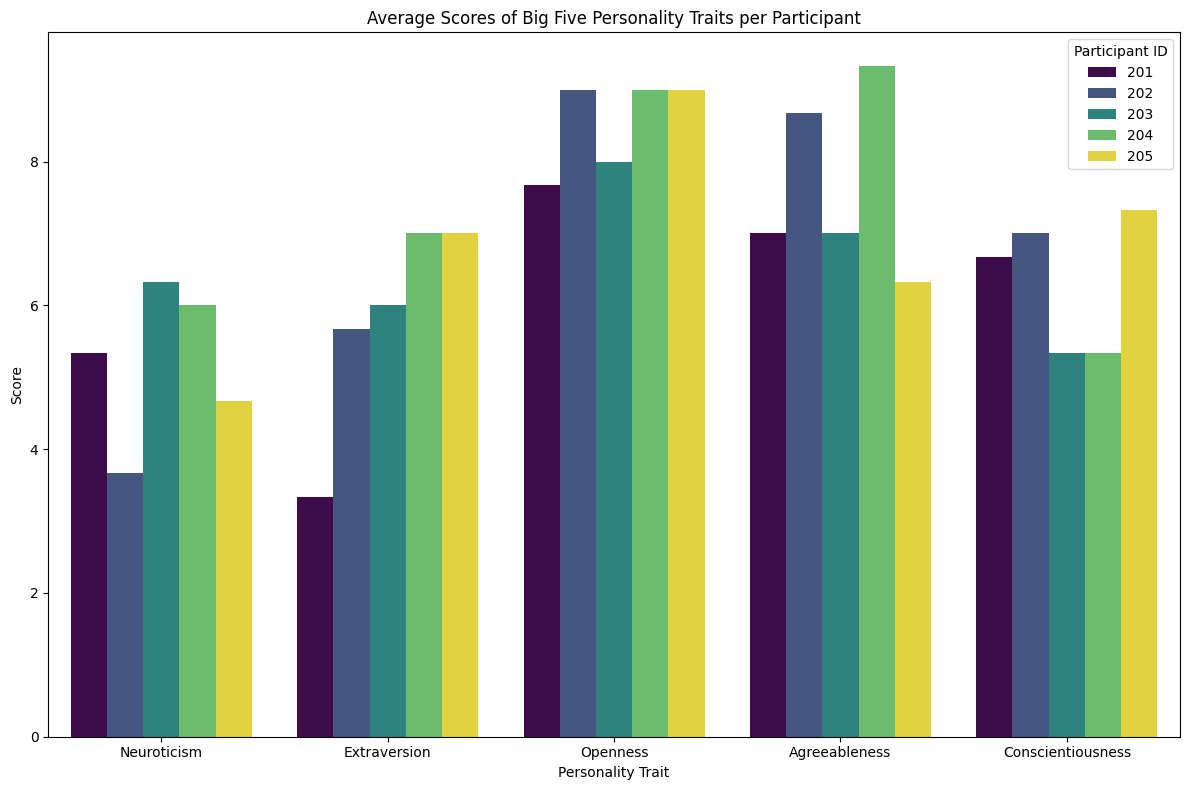

In [11]:
# Convert the DataFrame to a "long" format for seaborn
df_melted_bfi = df_bfi.reset_index().melt(
    id_vars='ID', var_name='Personality Trait', value_name='Average Score'
)

plt.figure(figsize=(12, 8))
sns.barplot(x='Personality Trait', y='Average Score', hue='ID', data=df_melted_bfi, palette='viridis')
plt.title('Average Scores of Big Five Personality Traits per Participant')
plt.ylabel('Score')
plt.xlabel('Personality Trait')
plt.legend(title='Participant ID')
plt.tight_layout()
plt.show()


C:\Users\gabri\AppData\Local\Temp\ipykernel_7144\2296300315.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Dark2', len(df_bfi.index))


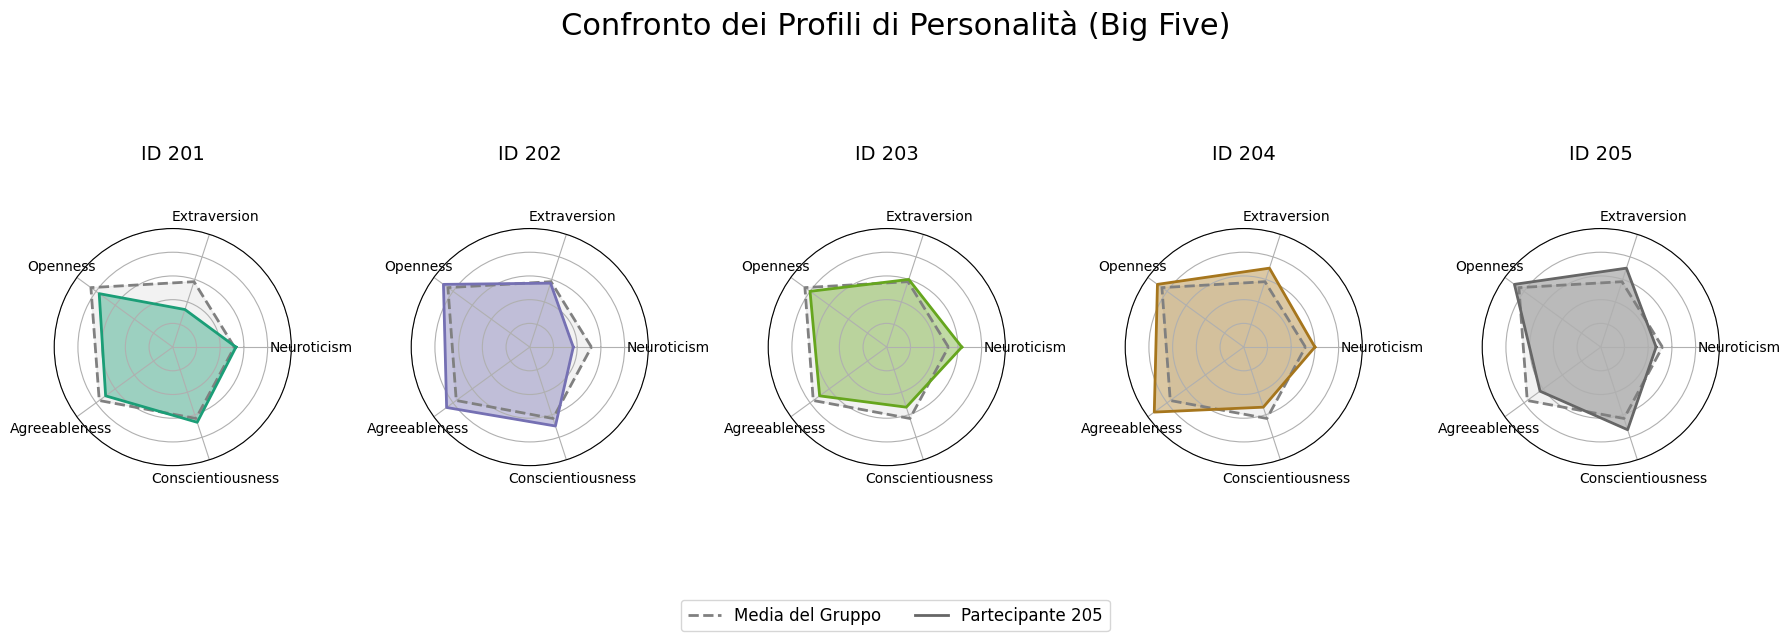

In [12]:
import numpy as np

# Calcola i valori medi per il gruppo
df_mean = df_bfi.mean(axis=0)

# Nomi dei tratti (li prendiamo direttamente dalle colonne di df_bfi)
labels = df_bfi.columns.tolist()
num_vars = len(labels)

# Impostiamo l'angolo per ogni asse
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Connette il primo e l'ultimo punto

# Definiamo una palette di colori per i partecipanti
colors = plt.cm.get_cmap('Dark2', len(df_bfi.index))

# Creiamo una figura unica con sottografi, uno per ogni partecipante
fig, axes = plt.subplots(1, len(df_bfi.index), figsize=(18, 7), subplot_kw=dict(polar=True))
fig.suptitle('Confronto dei Profili di Personalità (Big Five)', fontsize=22, y=0.95)

# Appiattisci l'array di assi per iterare facilmente
axes = axes.flatten()

# Iniziamo un ciclo per creare un grafico per ogni partecipante
for i, participant in enumerate(df_bfi.index):
    ax = axes[i]
    
    # === Tracciamo la linea della media del gruppo ===
    values_mean = df_mean.tolist()
    values_mean += values_mean[:1]
    ax.plot(angles, values_mean, color='gray', linestyle='dashed', linewidth=2, label='Media del Gruppo')
    ax.fill(angles, values_mean, color='gray', alpha=0.1)

    # === Tracciamo la linea del singolo partecipante ===
    values_participant = df_bfi.loc[participant].tolist()
    values_participant += values_participant[:1]
    ax.plot(angles, values_participant, color=colors(i), linewidth=2, label=f'Partecipante {participant}')
    ax.fill(angles, values_participant, color=colors(i), alpha=0.4)

    # Impostiamo le etichette degli assi e il titolo del sottografo
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10) # Utilizziamo le labels del dataframe
    ax.set_ylim(0, 10)
    ax.set_title(f'ID {participant}', size=14, pad=50)
    
# Aggiungiamo una legenda unica per tutti i sottografi
handles, labels_leg = ax.get_legend_handles_labels()
fig.legend(handles, labels_leg, loc='lower center', ncol=2, bbox_to_anchor=(0.5, 0.05), fontsize='large')

# Riduciamo gli spazi per un layout compatto e coerente
plt.tight_layout()
plt.show()

In [ ]:
file_path = 'ShortVRCombined.xlsx'

xls = pd.ExcelFile(file_path)
final_sheet_name = xls.sheet_names[0]
df_final = pd.read_excel(xls, sheet_name=final_sheet_name)

df_final

,Email,Name,Participation Date,ID (supposed to be),ID received by email,ID entered in the surveys
0,fsorrentino837@gmail.com,Francesco Sorrentino,2025-06-09,201,202,201
1,alessiavastola280498@gmail.com,Alessia Vastola,2025-06-09,202,203,203
2,barbescocarmen@gmail.com,Carmen Barbesco,2025-06-10,203,201,201
3,schisano25@gmail.com,Beatrice Schisano,2025-06-13,204,204,204
4,giacomozezza@live.it,Giacomo ?,2025-06-13,205,205,205


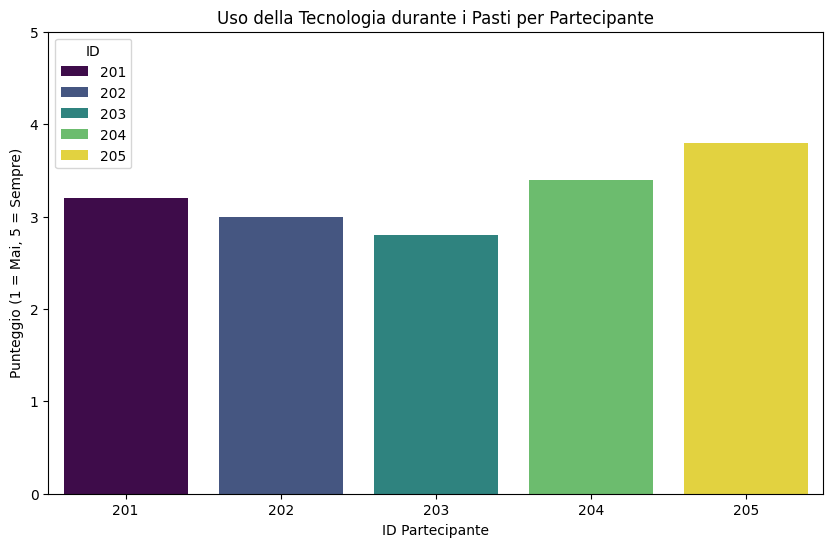

In [13]:
# Seleziona le colonne relative alle abitudini
df_abitudini = df_quantitativo[['UseofTech']].copy()

plt.figure(figsize=(10, 6))
sns.barplot(x=df_abitudini.index, y='UseofTech', data=df_abitudini, hue='ID', palette='viridis')
plt.title('Uso della Tecnologia durante i Pasti per Partecipante')
plt.ylabel('Punteggio (1 = Mai, 5 = Sempre)')
plt.xlabel('ID Partecipante')
plt.ylim(0, 5)  # Imposta il limite dell'asse y per avere un riferimento chiaro
plt.show()

## Positive And Negative Affect Scale (PANAS)

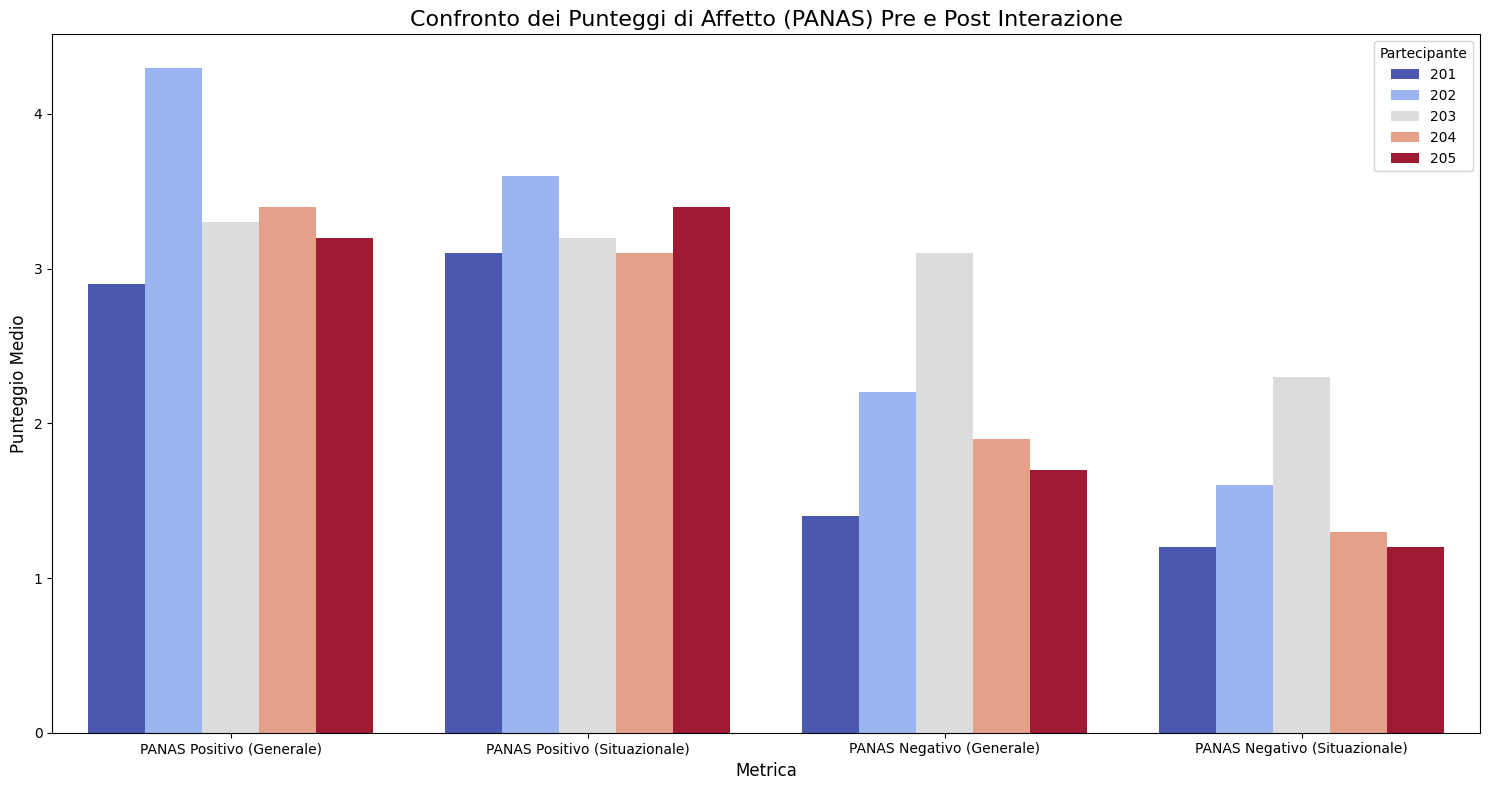

In [27]:
# Selezionare solo le colonne dei punteggi PANAS, riordinandole
df_panas = df_quantitativo[['PANAS_Pos', 'PANASSIT_Pos', 'PANAS_Neg', 'PANASSIT_Neg']].copy()

# Rinominare le colonne per chiarezza nel grafico, mantenendo l'ordine
df_panas.rename(columns={
    'PANAS_Pos': 'PANAS Positivo (Generale)',
    'PANASSIT_Pos': 'PANAS Positivo (Situazionale)',
    'PANAS_Neg': 'PANAS Negativo (Generale)',
    'PANASSIT_Neg': 'PANAS Negativo (Situazionale)'
}, inplace=True)

# Convertire il DataFrame in formato "lungo" per la visualizzazione con Seaborn
df_panas_melted = df_panas.reset_index().melt(
    id_vars='ID', 
    var_name='Metrica Affettiva', 
    value_name='Punteggio'
)

plt.figure(figsize=(15, 8))
sns.barplot(x='Metrica Affettiva', y='Punteggio', hue='ID', data=df_panas_melted, palette='coolwarm')
plt.title('Confronto dei Punteggi di Affetto (PANAS) Pre e Post Interazione', fontsize=16)
plt.ylabel('Punteggio Medio', fontsize=12)
plt.xlabel('Metrica', fontsize=12)
plt.legend(title='Partecipante')
plt.tight_layout()
plt.show()

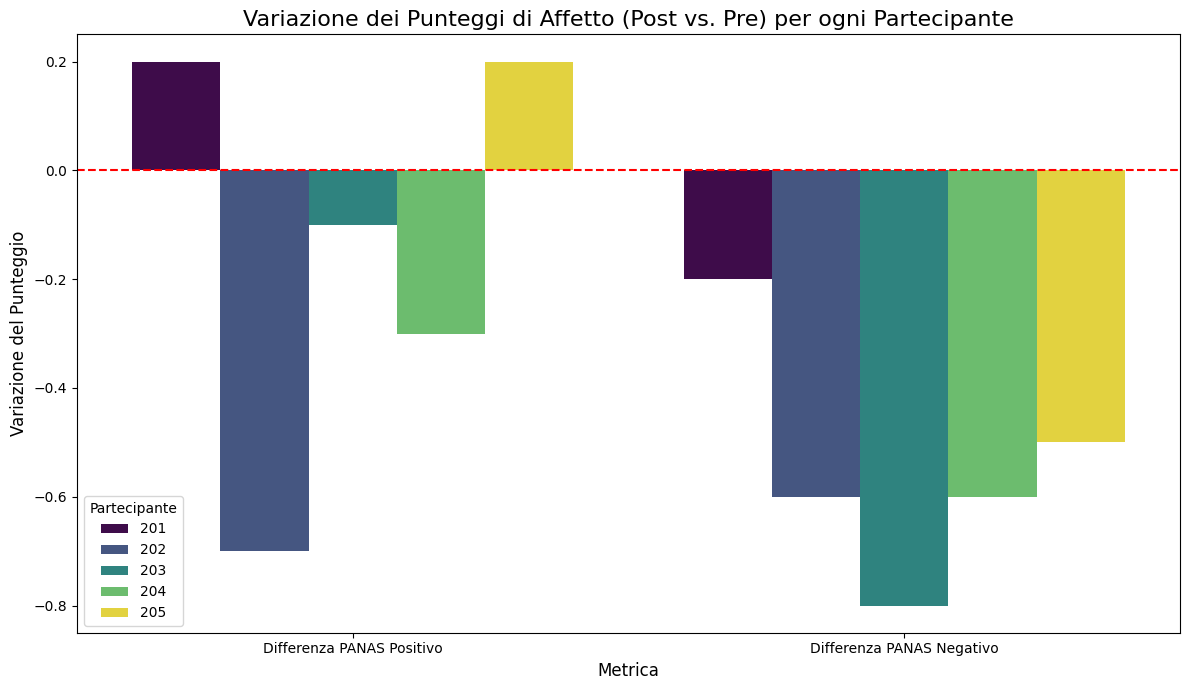

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_panas = df_final[['PANAS_Pos', 'PANASSIT_Pos', 'PANAS_Neg', 'PANASSIT_Neg']].copy()

# Calcolo delle differenze
# Una differenza positiva indica un aumento, una negativa una diminuzione
df_diff = pd.DataFrame()
df_diff['Differenza PANAS Positivo'] = df_panas['PANASSIT_Pos'] - df_panas['PANAS_Pos']
df_diff['Differenza PANAS Negativo'] = df_panas['PANASSIT_Neg'] - df_panas['PANAS_Neg']

# Preparazione del DataFrame per seaborn
df_diff_melted = df_diff.reset_index().melt(
    id_vars='ID', 
    var_name='Metrica', 
    value_name='Variazione'
)
df_diff_melted.rename(columns={'index': 'ID'}, inplace=True)

# Crea il grafico a barre con seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x='Metrica', y='Variazione', data=df_diff_melted, palette='viridis', hue='ID')
plt.title('Variazione dei Punteggi di Affetto (Post vs. Pre) per ogni Partecipante', fontsize=16)
plt.ylabel('Variazione del Punteggio', fontsize=12)
plt.xlabel('Metrica', fontsize=12)
plt.axhline(0, color='red', linestyle='--') # Linea di riferimento per la variazione zero
plt.legend(title='Partecipante')
plt.tight_layout()
plt.show()

DOMANDE APERTE

In [ ]:
df_